## Assignment 1 – Using NLTK and Vader Sentiment Analysis

In [43]:
!pip install py-readability-metrics

In [64]:
import matplotlib.pyplot as plt
import nltk
from nltk import ngrams, FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from readability import Readability
import PyPDF2
from wordcloud import WordCloud, STOPWORDS 

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\camar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\camar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\camar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\camar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [56]:
news_fox = PyPDF2.PdfReader('foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf')
news_reuters = PyPDF2.PdfReader('reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf')

In short, Fox News is a more conservative news outlet, while Reuters is more descriptive and neutral. The story concerns a Harvard president who holds more liberal views. Given this, Fox News takes a more critical stance toward the subject, bringing a more dramatic tone to the story and making stronger accusations. Fox News also raises controversial points beyond what were initially discussed. In contrast, Reuters remains concise and factual in its reporting, maintaining a descriptive approach while avoiding any political stance. However, given the severity of the issue, remaining neutral could also be considered a political stance in itself.

In [57]:
# Because the text has weird html parts
def clean_pdf_text(text):
    text = re.sub(r'\d+\s*/\s*\d+', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s.,!?;:\'-]', '', text)
    
    return text.strip()

# Extract and store text
fox_text = ""
for page in news_fox.pages:
    fox_text += page.extract_text()
fox_text = clean_pdf_text(fox_text)

reuters_text = ""
for page in news_reuters.pages:
    reuters_text += page.extract_text()
reuters_text = clean_pdf_text(reuters_text)

# Print part of each text
print("FOX NEWS:")
print(fox_text[:5000])
print("-" * 100)
print("REUTERS:")
print(reuters_text[:5000])
print("-" * 100)

# Get number of pages and display text
print(f"Fox News PDF: {len(news_fox.pages)} pages. Fox News text length: {len(fox_text)} characters")
print(f"Reuters PDF: {len(news_reuters.pages)} pages. Reuters text length: {len(reuters_text)} characters")

FOX NEWS:
Brian FloodEmbattled Harvard University President Claudine Gay hit with more plagiarism charges foxnews.com mediaembattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges Media Harvard received a complaint outlining over 40 allegations of plagiarism, according to the Free Beacon By Brian Flood Fox News Published December 20, 2023 12:59pm EST Harvard president facing 40 new allegations of plagiarism Fox News' Molly Line reports the latest on the allegations. Embattled Harvard University President Claudine Gay has been slapped with additional charges of plagiarism. The Washington Free Beacon reported Harvard received a complaint outlining over 40 allegations of plagiarism against Gay on T uesday , noting a letter was sent to Harvard's research integrity of ficer, Stacey Springs, outlining the claims. The document paints a picture of a pattern of misconduct more extensive than has been previously reported and puts the Harvard Corporation, the university's g

There are some numbers and weird characters inside the text (HTML), but other than that, it looks fine. What is interesting is the length of the articles, with Fox News being more than 50% longer.

### News Analysis

In [58]:
# Remove stopwords
fox_text_clean = " ".join([word for word in fox_text.split() if word.lower() not in nltk.corpus.stopwords.words('english')])
reuters_text_clean = " ".join([word for word in reuters_text.split() if word.lower() not in nltk.corpus.stopwords.words('english')])

# Calculate n-grams
fox_freqs = dict()
for ngram in [1, 2, 3, 4]:
    fox_freqs[ngram] = FreqDist(ngrams(fox_text_clean.split(), ngram))

reuters_freqs = dict()
for ngram in [1, 2, 3, 4]:
    reuters_freqs[ngram] = FreqDist(ngrams(reuters_text_clean.split(), ngram))

# Display most common n-grams for each
print("FOX NEWS - Most Common:")
for n in [1, 2, 3]:
    print(f"{n}-grams:")
    print(fox_freqs[n].most_common(5))

print("-" * 100)
print("REUTERS - Most Common:")
for n in [1, 2, 3]:
    print(f"{n}-grams:")
    print(reuters_freqs[n].most_common(5))

FOX NEWS - Most Common:
1-grams:
[(('Harvard',), 12), (('Gay',), 11), ((',',), 9), (('Free',), 8), (('Beacon',), 7)]
2-grams:
[(('Free', 'Beacon'), 7), (('Harvard', 'University'), 4), (('Fox', 'News'), 4), (('previously', 'reported'), 4), (('Gay', ','), 4)]
3-grams:
[(('Free', 'Beacon', 'reported'), 3), (("Harvard's", 'research', 'integrity'), 3), (('Harvard', 'University', 'President'), 2), (('University', 'President', 'Claudine'), 2), (('President', 'Claudine', 'Gay'), 2)]
----------------------------------------------------------------------------------------------------
REUTERS - Most Common:
1-grams:
[(('Harvard',), 7), (('Gay',), 7), ((',',), 6), (('Gabriella',), 4), (('dissertation',), 4)]
2-grams:
[(('plagiarism', 'allegations'), 3), (('university', 'spokesperson'), 3), (('spokesperson', 'said.'), 3), (('Advertisement', 'Scroll'), 3), (('Claudine', 'Gay'), 2)]
3-grams:
[(('university', 'spokesperson', 'said.'), 2), ((',', 'university', 'spokesperson'), 2), (('Advertisement', 'S

Fox News prominently features ('Free', 'Beacon', 'reported'), indicating heavy reliance on a conservative news outlet as their primary source.  On the other hand, Reuters focuses more on direct institutional sources, with ('university', 'spokesperson', 'said.'), indicating a more official coverage.

In [59]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

fox_sentiment = sid.polarity_scores(fox_text_clean)
reuters_sentiment = sid.polarity_scores(reuters_text_clean)

print (f"FOX NEWS: {fox_sentiment}" )
print (f"REUTERS: {reuters_sentiment}")

FOX NEWS: {'neg': 0.091, 'neu': 0.802, 'pos': 0.107, 'compound': 0.878}
REUTERS: {'neg': 0.096, 'neu': 0.881, 'pos': 0.024, 'compound': -0.9735}


The sentiment analysis produced surprising results: Fox News scored highly positive (0.87) while Reuters scored highly negative (-0.97). However, the n-gram analysis revealed the opposite pattern, with Fox News showing more critical and accusatory language. Having read both articles, I found the n-gram approach more consistent with reality. **This demonstrates the limitations of sentiment analysis tools and highlights the need for multiple types of analysis to gain an accurate understanding of text.**

In [60]:
fox_sentiment_title = sid.polarity_scores("Embattled Harvard University President Claudine Gay hitwith more plagiarism charges")
reuters_sentiment_title = sid.polarity_scores("Harvard president will submit dissertation edits afterplagiarism allegations")

print (f"FOX NEWS: {fox_sentiment_title}" )
print (f"REUTERS: {reuters_sentiment_title}")

FOX NEWS: {'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'compound': -0.3353}
REUTERS: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


Analyzing only the headlines produces more realistic scores for both articles, with Fox News showing negative sentiment and Reuters showing **neutral sentiment.**

In [63]:
# News readability
fox_readability = Readability(fox_text)
print("FOX NEWS:")
print(f"Flesch Reading Ease: {fox_readability.flesch().score:.2f}")
print(f"Gunning Fog Index: {fox_readability.gunning_fog().score:.2f}")

print("REUTERS:")
reuters_readability = Readability(reuters_text)
print(f"Flesch Reading Ease: {reuters_readability.flesch().score:.2f}")
print(f"Gunning Fog Index: {reuters_readability.gunning_fog().score:.2f}")

FOX NEWS:
Flesch Reading Ease: 17.26
Gunning Fog Index: 21.90
REUTERS:
Flesch Reading Ease: 14.15
Gunning Fog Index: 19.31


- The Flesch Reading Ease score (0-100) measures text difficulty based on sentence length and syllables per word, where lower scores indicate harder text.
- The Gunning Fog Index estimates the years of formal education needed to understand the text on first reading, calculated from sentence complexity and the percentage of words with three or more syllables.

Based on the results, both articles are difficult to read. In terms of the Flesch score, Fox News scored 17.26 versus Reuters' 14.15, making Reuters more difficult. The Gunning Fog Index shows Fox News requires 21.90 years of education compared to Reuters' 19.31 years, making Fox News slightly more complex in this metric. Despite their different editorial approaches, given the topic, **both outlets use complex language.**

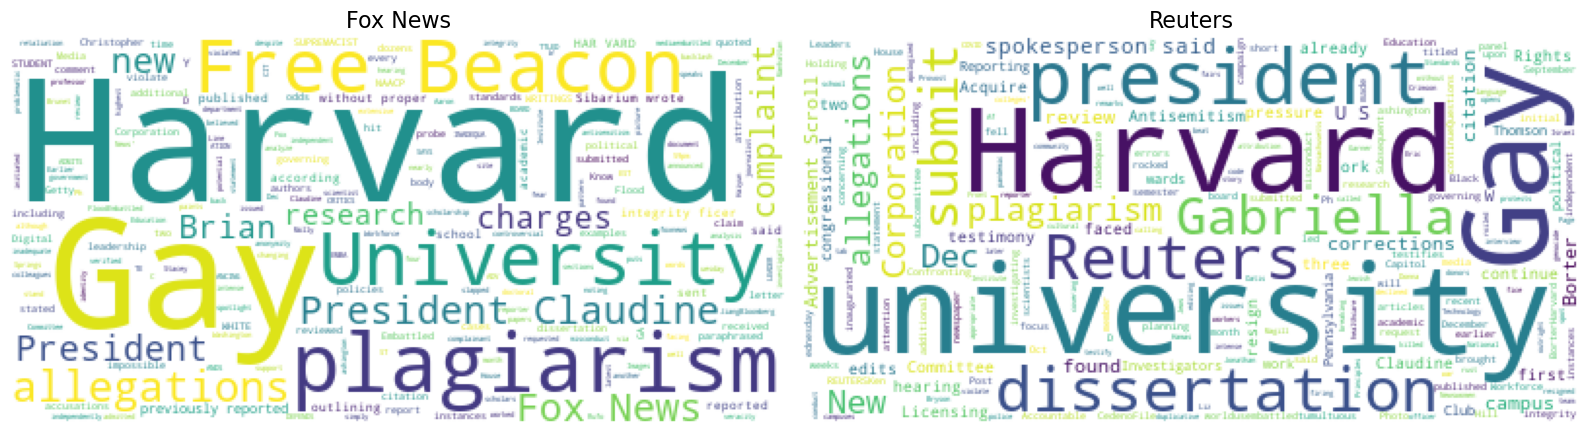

In [71]:
# Generate word clouds
fox_cloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(fox_text_clean)
reuters_cloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(reuters_text_clean)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(fox_cloud)
axes[0].set_title('Fox News', fontsize=16)
axes[0].axis('off')

# Reuters word cloud
axes[1].imshow(reuters_cloud)
axes[1].set_title('Reuters', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

The word cloud makes it very obvious that words like 'plagiarism' and 'allegations' are prominent in Fox News coverage, while in Reuters these same words are less dominant and the focus shifts more toward the entities and people involved. Overall, this serves as a great visual indicator of the different biases and communication styles each news outlet has.